<a href="https://colab.research.google.com/github/AkinyemiGbenga/Projects/blob/main/Assignment_9_Akinyemi_Gbenga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7 (Week 9)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
- Remember to read the `instructions` carefully.
```

## Name: AKINYEMI GBENGA

<br>

## Please show and display ALL your calculations and results.


> Data source is from **Kaggle**. To complete this assignment, you **must create an account** with **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

<br><hr>


###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


In [12]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
#%load_ext lab_black

In [4]:
# Import and load data

from google.colab import files
uploaded = files.upload()



Saving Ulta Skincare Reviews.csv to Ulta Skincare Reviews.csv


In [5]:
df = pd.read_csv('Ulta Skincare Reviews.csv')
df.head(3)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [6]:
print(f"Shape of Data: {df.shape}\n")

Shape of Data: (4150, 10)



In [8]:
# Check data type

df.dtypes

Review_Title        object
Review_Text         object
Verified_Buyer      object
Review_Date         object
Review_Location     object
Review_Upvotes       int64
Review_Downvotes     int64
Product             object
Brand               object
Scrape_Date         object
dtype: object

In [9]:
# Check for NaNs
df.isna().sum()

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [10]:
df["Product"].value_counts(normalize=True).mul(100)

Daily Superfoliant             36.144578
Daily Microfoliant             36.144578
Hydro Masque Exfoliant         19.277108
Multi-Vitamin Thermafoliant     8.433735
Name: Product, dtype: float64

In [13]:
# Extract the reviews column
Reviews = df["Review_Title"]

# Calculate the sentiment of each review
sentiments = Reviews.apply(lambda x: TextBlob(x).sentiment.polarity)

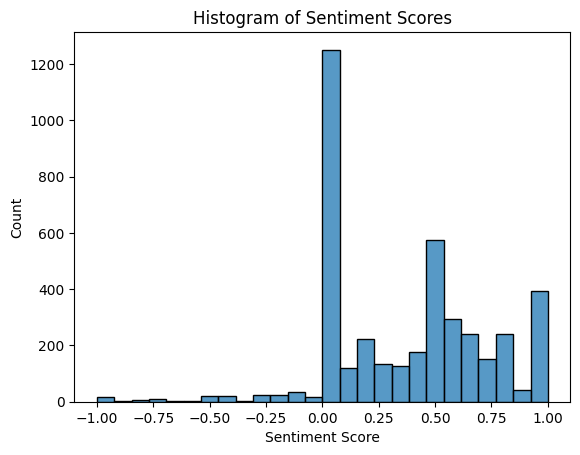

In [14]:
# Plot a histogram of the sentiment scores
sns.histplot(sentiments, kde=False)
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.title("Histogram of Sentiment Scores")
plt.show()

In [15]:
# Identify the most frequent words in the reviews
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(Reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))
top_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top words and their frequencies
print("Top words:")
for word, freq in top_words:
    print(f"{word}: {freq}")

Top words:
love: 738
product: 727
skin: 427
great: 389
buy: 354
amazing: 280
exfoliant: 197
best: 176
gentle: 139
good: 135


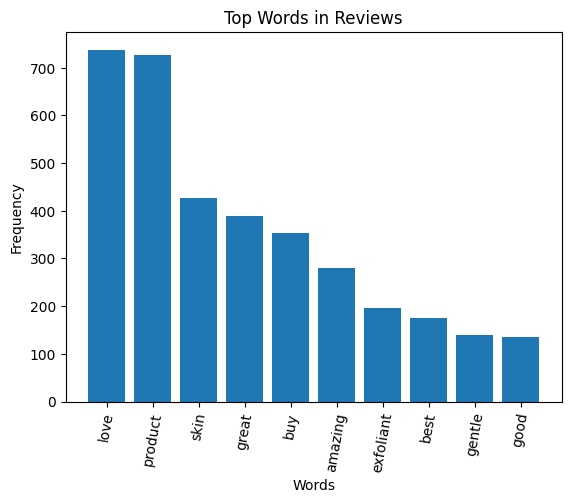

In [16]:
# Plot a bar chart of the top words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.xlabel("Words")
plt.tick_params(axis="x", rotation=80)
plt.ylabel("Frequency")
plt.title("Top Words in Reviews")
plt.show()

The above bar chart shows that most of the customers love the product based on the review title. Words like Love, Grat, Amazing, Best, Gentle and Good were use to describe the product. And Love was used the most.

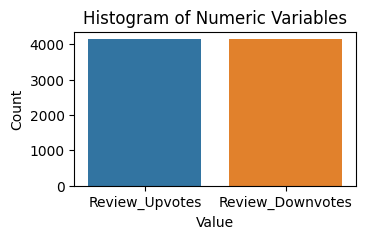

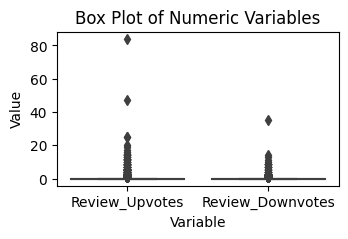

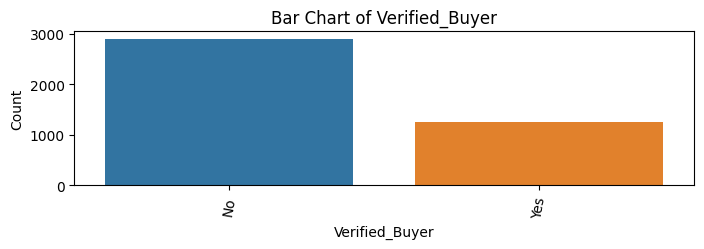

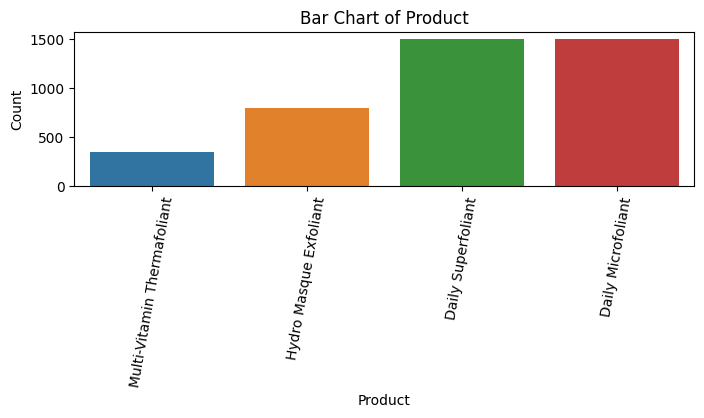

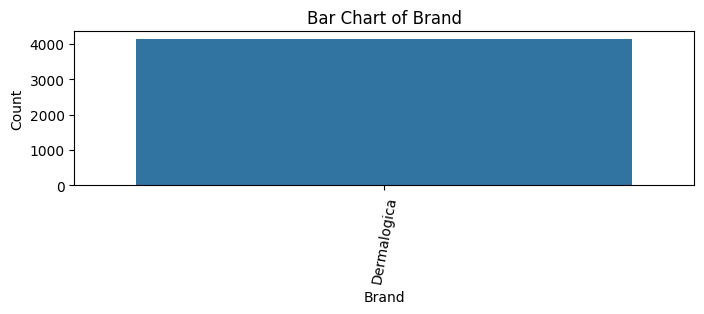

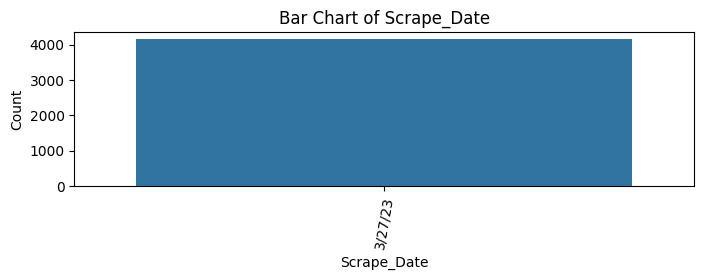

In [18]:
# Plot a histogram of the numeric variables

plt.figure(figsize=[8,2])
plt.subplot(1,2,1)
numeric_vars = ["Review_Upvotes", "Review_Downvotes"]
sns.countplot(data=df[numeric_vars])
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Histogram of Numeric Variables")


# Plot a box plot of the numeric variables
plt.figure(figsize=[8,2])
plt.subplot(1,2,1)
sns.boxplot(data=df[numeric_vars])
plt.xlabel("Variable")
plt.ylabel("Value")
plt.title("Box Plot of Numeric Variables")


# Plot a bar chart of the categorical variables
categorical_vars = ["Verified_Buyer", "Product", "Brand", "Scrape_Date"]
for var in categorical_vars:
    plt.figure(figsize=[8,2])
    sns.countplot(data=df, x=var)
    plt.xlabel(var)
    plt.tick_params(axis="x", rotation=80)
    plt.ylabel("Count")
    plt.title(f"Bar Chart of {var}")


Based on the data and Bar chart above, we can conclude that most of the users of the product have common skincare issue because the majority of them use products;
 Daily Superfoliant - 36.144578 and Daily Microfoliant -    36.144578.

We can also conclude that the products helped solved skin issues and helped with skincare routine.


###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

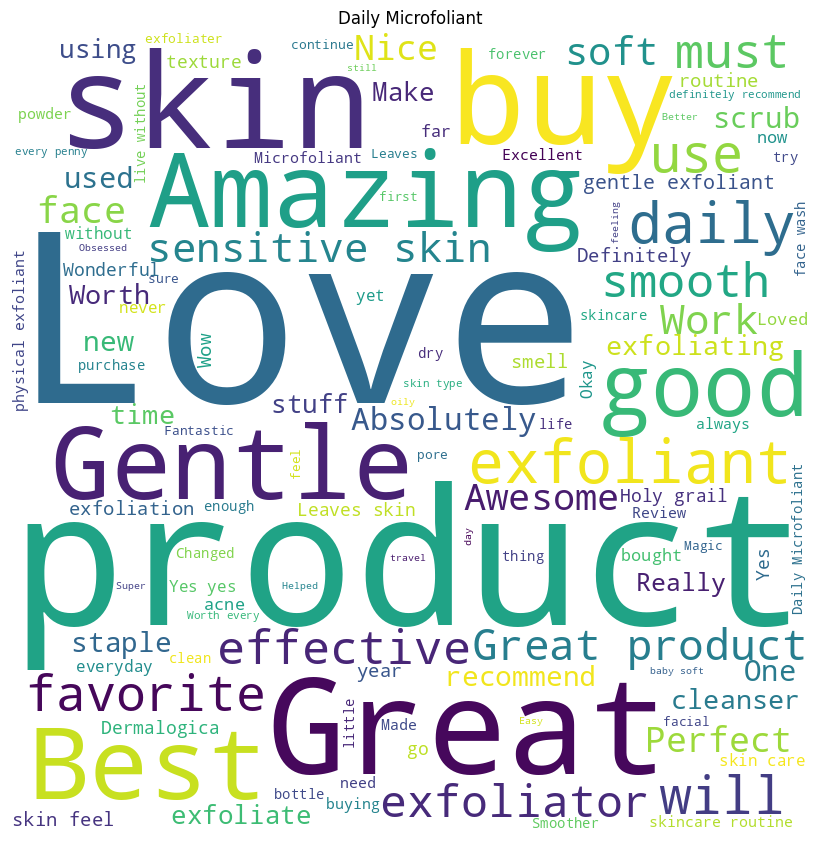

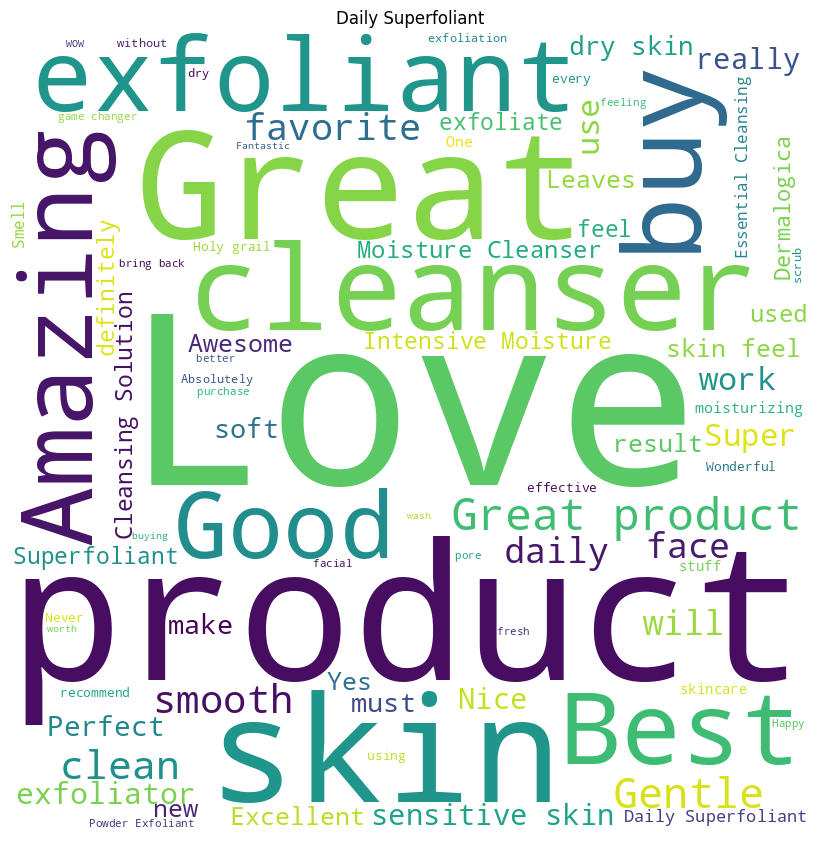

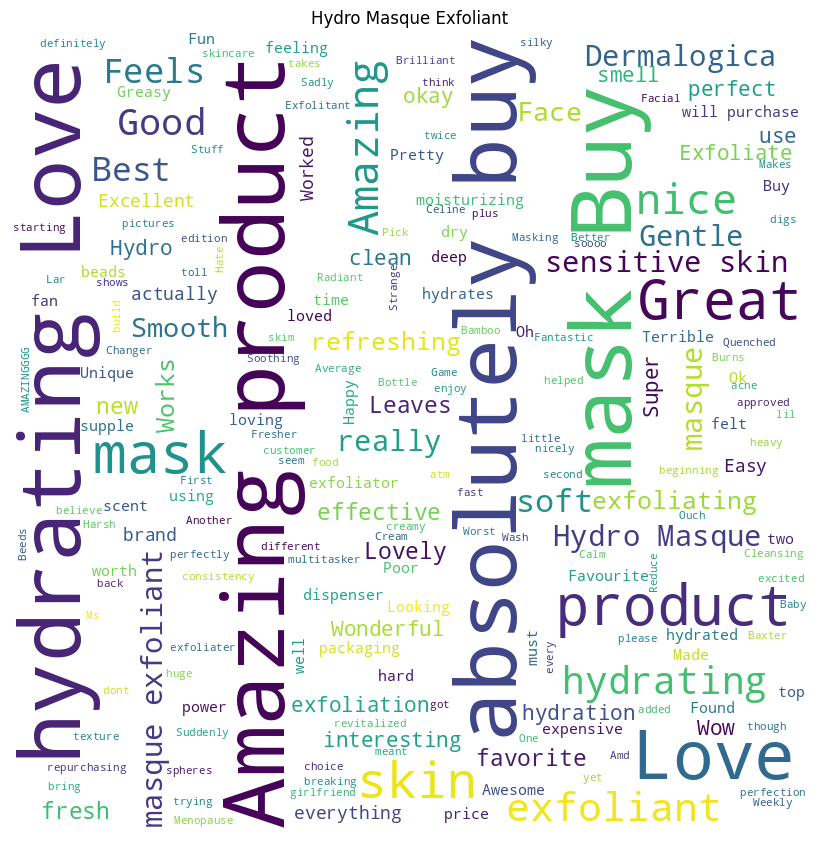

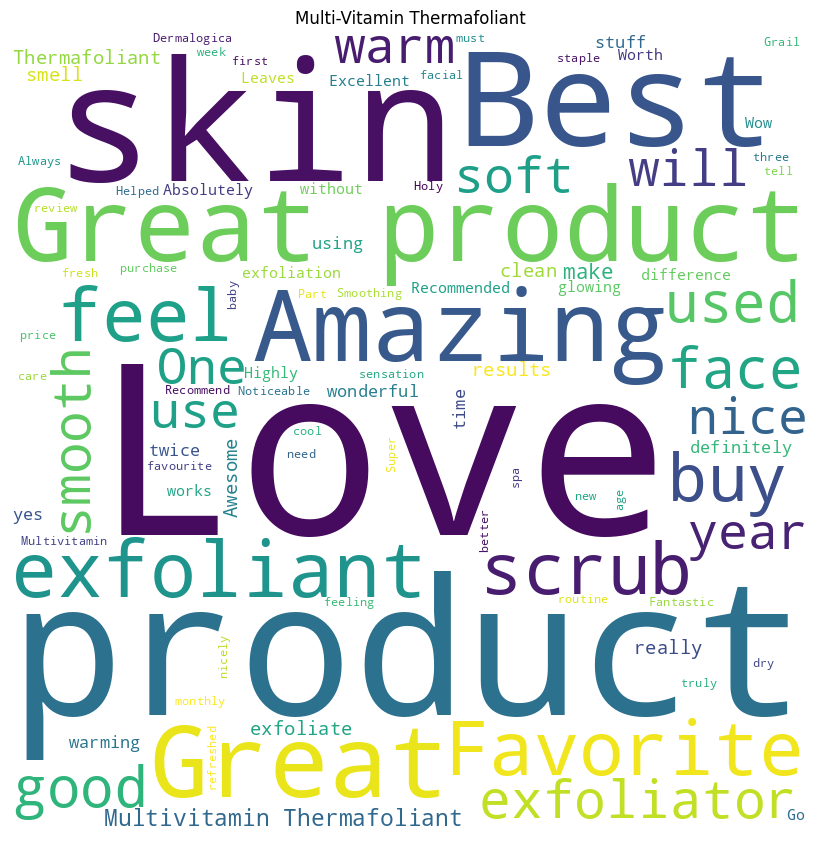

In [20]:
from wordcloud import WordCloud

# Group data by product and concatenate the descriptions
Product_Descriptions = df.groupby('Product')['Review_Title'].apply(lambda x: ' '.join(x))

# Create a wordcloud for each product
for Product, Review_Title in Product_Descriptions.items():
    # Generate the wordcloud image
    wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate(Review_Title)
    
    # Plot the wordcloud
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(Product)
    plt.show()

The above images shows the wordcloud of the words/phrases commonly associated with each product.

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [26]:
# Create a TextBlob object for each review and extract the polarity
df['polarity'] = df['Review_Title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Map polarity to sentiment labels (positive or negative)
df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else 'negative')




In [27]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review_Title'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)



In [28]:
# Train a LinearSVC model on the training data
clf = LinearSVC()
clf.fit(X_train_vect, y_train)

# Evaluate the model on the testing data
accuracy = clf.score(X_test_vect, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9433734939759036
